### langgraph Í∏∞Î≥∏ Í∑∏ÎûòÌîÑ ÏÉùÏÑ±

1. State Ï†ïÏùò
2. ÎÖ∏Îìú Ï†ïÏùò
3. Í∑∏ÎûòÌîÑ Ï†ïÏùò
4. Í∑∏ÎûòÌîÑ Ïª¥ÌååÏùº
5. Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

In [ ]:
!pip install -r requirements.txt

In [2]:
# StateÏ†ïÏùò(ÏïÑÎûòÎäî ÌòïÌÉúÎ•º Ï†ÅÏñ¥ÎÜìÏïòÏùÑÎøê Ïã§Ï†úÍ∞íÏù¥ÎÇò Î≥ÄÏàòÎ•º ÏûÖÎ†•ÌïòÏó¨ ÏûëÏÑ±ÌïúÍ≤ÉÏùÄ ÏïÑÎãò)

from typing import TypedDict, Annotated, List
from langchain_core.documents import Document
import operator

class GraphState(TypedDict):
    context : Annotated[List[Document], operator.add]  # Î¶¨Ïä§Ìä∏Îäî Ïï†ÎìúÍ∞Ä Í∞ÄÎä•
    answer : Annotated[List[Document], operator.add]
    question : Annotated[str,"user question"]          # Î¨∏ÏûêÏó¥ÏóêÎäî Ïï†ÎìúÍ∞Ä ÏïàÎêòÎãà Í∑∏ÎÉ• Ï†ïÏùòÎ¨∏ÏùÑ Ïç®Îë†Îë†
    sql_query : Annotated[str,"sql query"]
    binary_score : Annotated[str,"binary score yes or no"]

In [3]:
# ÎÖ∏ÎìúÏ†ïÏùò(ÏïÑÎûòÎäî ÌòïÌÉúÎ•º Ï†ÅÏñ¥ ÎÜìÏïòÏùÑÎøê Ïã§Ï†úÍ∞íÏù¥ÎÇò Î≥ÄÏàòÎ•º ÏûÖÎ†•ÌïòÏó¨ ÏûëÏÑúÌïúÍ≤ÉÏùÄ ÏïÑÎãò)
# ÎÖ∏ÎìúÎäî Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Ìï®ÏàòÍµ¨Ï°∞Î°ú Ï†ïÏùòÌïúÎã§.

def retrive(state:GraphState) -> GraphState:
    # retrive : Í≤ÄÏÉâ Í∏∞Îä• ÎÖ∏Îìú
    documents = "Í≤ÄÏÉâÎêú Î¨∏ÏÑú"
    return {"context" : documents}   # ÏûÖÎ†•ÎèÑ stateÍ≥† Ï∂úÎ†•ÎèÑ stateÏù¥ÏßÄÎßå key/valueÌòïÌÉúÎ°ú Ìï¥ÎèÑ ÎêúÎã§ ÏÇ¨Ïã§ÏÉÅ Í∞ôÏùÄÍ±∞Îã§

def rewrite_query(state:GraphState) -> GraphState:
    # Query Transform : ÏøºÎ¶¨ Ïû¨ÏûëÏÑ±
    documents = "Í≤ÄÏÉâÎêú Î¨∏ÏÑú"
    return GraphState(context=documents) # Ïù¥Î†áÍ≤å Î∞òÌôòÏùÑ ÌïòÎäîÍ≤ÉÏù¥ Ï†ïÏÑùÍ∞ôÏùÄÍ±∞Îãà Ïù¥Íµ¨Ï°∞Í∞Ä Ï¢ãÎã§

def llm_gpt_execute(state:GraphState) -> GraphState:
    # LLM Ïã§Ìñâ
    answer = "GPT ÏÉùÏÑ±Îêú ÎãµÎ≥Ä"
    return GraphState(answer=answer)

def llm_claude_execute(state:GraphState) -> GraphState:
    # LLM Ïã§Ìñâ
    answer = "Claude ÏÉùÏÑ±Îêú ÎãµÎ≥Ä"
    return GraphState(answer=answer)

def relevance_check(state:GraphState) -> GraphState:
    # Relevance Check : Í¥ÄÎ†®ÏÑ± ÌôïÏù∏
    binary_score = "Relevance Score"
    return GraphState(binary_score=binary_score)

def sum_up(state:GraphState) -> GraphState:
    # sum_up : Í≤∞Í≥º Ï¢ÖÌï©
    answer = "Ï¢ÖÌï©Îêú ÎãµÎ≥Ä"
    return GraphState(answer=answer)

def search_on_web(state:GraphState) -> GraphState:
    # Search on web : Ïõπ Í≤ÄÏÉâ
    documents = state["context"] = "Í∏∞Ï°¥Î¨∏ÏÑú"
    searched_documents = "Í≤ÄÏÉâÎêú Î¨∏ÏÑú"
    documents += searched_documents
    return GraphState(context=documents)

def get_table_info(state:GraphState) -> GraphState:
    # get table info : ÌÖåÏù¥Î∏î Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞
    table_info = "ÌÖåÏù¥Î∏î Ï†ïÎ≥¥"
    return GraphState(context=table_info)

def generate_sql_query(state : GraphState) -> GraphState:
    # Make SQL Query : SQL ÏøºÎ¶¨ ÏÉùÏÑ±
    sql_query = "SQL ÏøºÎ¶¨"
    return GraphState(sql_query=sql_query)

def execute_sql_query(state : GraphState) -> GraphState:
    # Execute SQL Query : SQL ÏøºÎ¶¨ Ïã§Ìñâ
    sql_result = "SQL Í≤∞Í≥º"
    return GraphState(context=sql_result)

def validate_sql_query(state : GraphState) -> GraphState:
    # Validate SQL Query : SQL ÏøºÎ¶¨ Í≤ÄÏ¶ù
    binary_score = "SQL ÏøºÎ¶¨ Í≤ÄÏ¶ù Í≤∞Í≥º"
    return GraphState(binary_score=binary_score)

def handle_error(stest:GraphState) -> GraphState:
    # Error handling : ÏóêÎü¨Ï≤òÎ¶¨
    error = "ÏóêÎü¨ Î∞úÏÉù"
    return GraphState(context=error)

def decision(state:GraphState) -> GraphState:
    # ÏùòÏÇ¨Í≤∞Ï†ï
    decision = "Í≤∞Ï†ï"
    return decision

### 1. Í∞ÄÏû•Í∞ÑÎã®Ìïú Íµ¨Ï°∞Ïù∏ conventional RAG

In [4]:
from langgraph.graph import END, StateGraph
from langgraph.checkpoint.memory import MemorySaver
from langchain_teddynote.graphs import visualize_graph

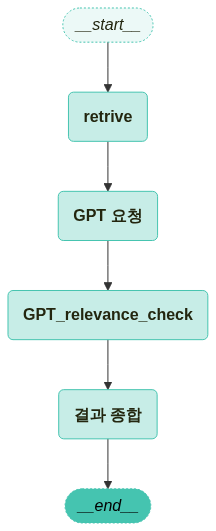

In [5]:
#langgraph.graphÏóêÏÑú StateGraphÏôÄ ENDÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
workflow = StateGraph(GraphState)

# ÎÖ∏ÎìúÎ•º Ï∂îÍ∞Ä Ìï©ÎãàÎã§.
workflow.add_node("retrive", retrive)
workflow.add_node("GPT ÏöîÏ≤≠",llm_gpt_execute)
workflow.add_node("GPT_relevance_check", relevance_check)
workflow.add_node("Í≤∞Í≥º Ï¢ÖÌï©", sum_up)

# Í∞Å ÎÖ∏ÎìúÎ•º Ïó∞Í≤∞ Ìï©ÎãàÎã§.
workflow.add_edge("retrive","GPT ÏöîÏ≤≠")
workflow.add_edge("GPT ÏöîÏ≤≠","GPT_relevance_check")
workflow.add_edge("GPT_relevance_check","Í≤∞Í≥º Ï¢ÖÌï©")
workflow.add_edge("Í≤∞Í≥º Ï¢ÖÌï©",END)

workflow.set_entry_point("retrive")
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

visualize_graph(app)

### 2. 1Î≤àÏùò Í∏∞Î≥∏ conventional RAGÏóê Ïû¨Í≤ÄÏÉâ ÌïòÎäî Î°úÏßÅ Ï∂îÍ∞Ä

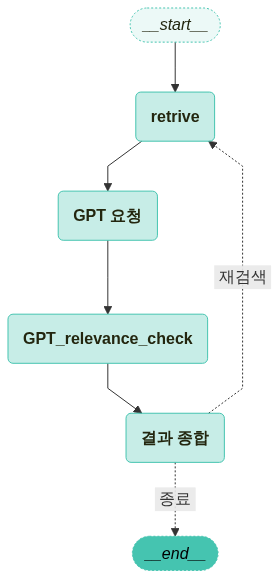

In [6]:
#langgraph.graphÏóêÏÑú StateGraphÏôÄ ENDÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
workflow = StateGraph(GraphState)

# ÎÖ∏ÎìúÎ•º Ï∂îÍ∞Ä Ìï©ÎãàÎã§.
workflow.add_node("retrive", retrive)
workflow.add_node("GPT ÏöîÏ≤≠",llm_gpt_execute)
workflow.add_node("GPT_relevance_check", relevance_check)
workflow.add_node("Í≤∞Í≥º Ï¢ÖÌï©", sum_up)

# Í∞Å ÎÖ∏ÎìúÎ•º Ïó∞Í≤∞ Ìï©ÎãàÎã§.
workflow.add_edge("retrive","GPT ÏöîÏ≤≠")
workflow.add_edge("GPT ÏöîÏ≤≠","GPT_relevance_check")
workflow.add_edge("GPT_relevance_check","Í≤∞Í≥º Ï¢ÖÌï©")

workflow.add_conditional_edges(
    "Í≤∞Í≥º Ï¢ÖÌï©",
    decision,
    {
        "Ïû¨Í≤ÄÏÉâ" : "retrive",
        "Ï¢ÖÎ£å" : END,
    },
)

workflow.set_entry_point("retrive")
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

visualize_graph(app)

### 3. Î©ÄÌã∞ LLM Î°úÏßÅ

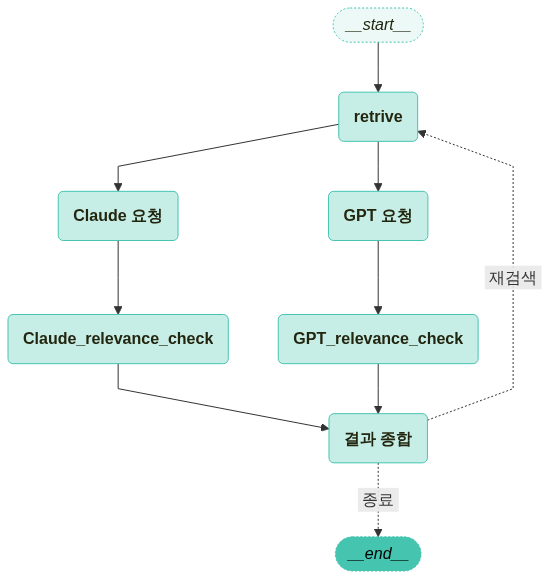

In [7]:
#langgraph.graphÏóêÏÑú StateGraphÏôÄ ENDÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
workflow = StateGraph(GraphState)

# ÎÖ∏ÎìúÎ•º Ï∂îÍ∞Ä Ìï©ÎãàÎã§.
workflow.add_node("retrive", retrive)
workflow.add_node("GPT ÏöîÏ≤≠",llm_gpt_execute)
workflow.add_node("Claude ÏöîÏ≤≠",llm_claude_execute)
workflow.add_node("GPT_relevance_check", relevance_check)
workflow.add_node("Claude_relevance_check", relevance_check)
workflow.add_node("Í≤∞Í≥º Ï¢ÖÌï©", sum_up)

# Í∞Å ÎÖ∏ÎìúÎ•º Ïó∞Í≤∞ Ìï©ÎãàÎã§.
workflow.add_edge("retrive","GPT ÏöîÏ≤≠")
workflow.add_edge("retrive","Claude ÏöîÏ≤≠")
workflow.add_edge("GPT ÏöîÏ≤≠","GPT_relevance_check")
workflow.add_edge("Claude ÏöîÏ≤≠","Claude_relevance_check")
workflow.add_edge("GPT_relevance_check","Í≤∞Í≥º Ï¢ÖÌï©")
workflow.add_edge("Claude_relevance_check","Í≤∞Í≥º Ï¢ÖÌï©")

workflow.add_conditional_edges(
    "Í≤∞Í≥º Ï¢ÖÌï©",
    decision,
    {
        "Ïû¨Í≤ÄÏÉâ" : "retrive",
        "Ï¢ÖÎ£å" : END,
    },
)

workflow.set_entry_point("retrive")
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

visualize_graph(app)

### 4. 3Î≤àÏóê ÏøºÎ¶¨Ïû¨ÏûëÏÑ± ÎÖ∏Îìú Ï∂îÍ∞Ä

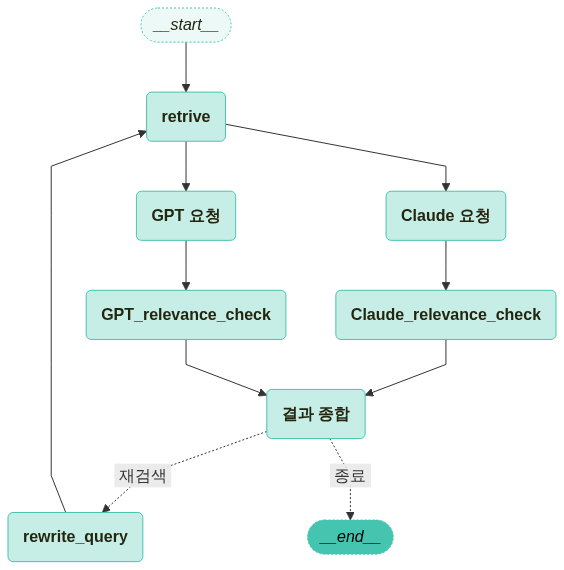

In [8]:
#langgraph.graphÏóêÏÑú StateGraphÏôÄ ENDÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
workflow = StateGraph(GraphState)

# ÎÖ∏ÎìúÎ•º Ï∂îÍ∞Ä Ìï©ÎãàÎã§.
workflow.add_node("retrive", retrive)
workflow.add_node("rewrite_query", rewrite_query)
workflow.add_node("GPT ÏöîÏ≤≠",llm_gpt_execute)
workflow.add_node("Claude ÏöîÏ≤≠",llm_claude_execute)
workflow.add_node("GPT_relevance_check", relevance_check)
workflow.add_node("Claude_relevance_check", relevance_check)
workflow.add_node("Í≤∞Í≥º Ï¢ÖÌï©", sum_up)

# Í∞Å ÎÖ∏ÎìúÎ•º Ïó∞Í≤∞ Ìï©ÎãàÎã§.
workflow.add_edge("retrive","GPT ÏöîÏ≤≠")
workflow.add_edge("retrive","Claude ÏöîÏ≤≠")
workflow.add_edge("rewrite_query","retrive")
workflow.add_edge("GPT ÏöîÏ≤≠","GPT_relevance_check")
workflow.add_edge("Claude ÏöîÏ≤≠","Claude_relevance_check")
workflow.add_edge("GPT_relevance_check","Í≤∞Í≥º Ï¢ÖÌï©")
workflow.add_edge("Claude_relevance_check","Í≤∞Í≥º Ï¢ÖÌï©")

workflow.add_conditional_edges(
    "Í≤∞Í≥º Ï¢ÖÌï©",  # Í¥ÄÎ†®ÏÑ± Ï≤¥ÌÅ¨ ÎÖ∏ÎìúÏóêÏÑú ÎÇòÏò® Í≤∞Í≥ºÎ¨ºÏùÑ is_relevant Ìï®ÏàòÏóê Ï†ÑÎã¨ Ìï©ÎãàÎã§.
    decision,
    {
        "Ïû¨Í≤ÄÏÉâ" : "rewrite_query", # Í¥ÄÎ†®ÏÑ± Ï≤¥ÌÅ¨ Í≤∞Í≥ºÍ∞Ä Î™®Ìò∏ÌïòÎã§Î©¥ Îã§Ïãú ÎãµÎ≥ÄÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
        "Ï¢ÖÎ£å" : END,   # Í¥ÄÎ†®ÏÑ±Ïù¥ ÏóÜÏúºÎ©¥ Ï¢ÖÎ£å Ìï©ÎãàÎã§. 
    },
)

workflow.set_entry_point("retrive")
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

visualize_graph(app)

### 5. SQL RAG

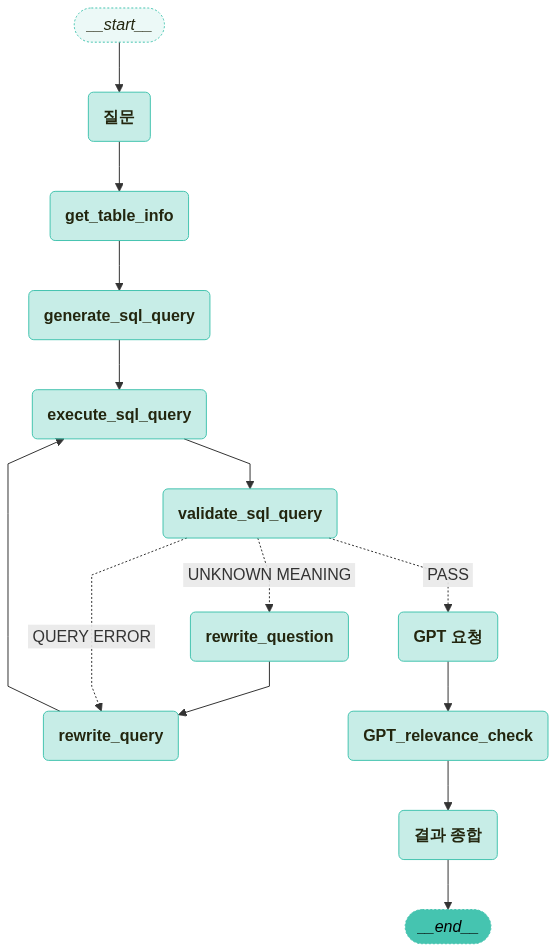

In [9]:
#langgraph.graphÏóêÏÑú StateGraphÏôÄ ENDÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
workflow = StateGraph(GraphState)

# ÎÖ∏ÎìúÎ•º Ï∂îÍ∞Ä Ìï©ÎãàÎã§.
workflow.add_node("ÏßàÎ¨∏", retrive)
workflow.add_node("get_table_info", get_table_info)
workflow.add_node("generate_sql_query",generate_sql_query)
workflow.add_node("execute_sql_query",execute_sql_query)
workflow.add_node("validate_sql_query", validate_sql_query)
workflow.add_node("rewrite_question", rewrite_query)
workflow.add_node("rewrite_query", rewrite_query)
workflow.add_node("GPT ÏöîÏ≤≠",llm_gpt_execute)
workflow.add_node("GPT_relevance_check", relevance_check)
workflow.add_node("Í≤∞Í≥º Ï¢ÖÌï©", sum_up)

# Í∞Å ÎÖ∏ÎìúÎ•º Ïó∞Í≤∞ Ìï©ÎãàÎã§.
workflow.add_edge("ÏßàÎ¨∏","get_table_info")
workflow.add_edge("get_table_info","generate_sql_query")
workflow.add_edge("generate_sql_query","execute_sql_query")
workflow.add_edge("execute_sql_query","validate_sql_query")

workflow.add_conditional_edges(
    "validate_sql_query",  # Í¥ÄÎ†®ÏÑ± Ï≤¥ÌÅ¨ ÎÖ∏ÎìúÏóêÏÑú ÎÇòÏò® Í≤∞Í≥ºÎ¨ºÏùÑ is_relevant Ìï®ÏàòÏóê Ï†ÑÎã¨ Ìï©ÎãàÎã§.
    decision,
    {
        "UNKNOWN MEANING" : "rewrite_question",
        "QUERY ERROR" : "rewrite_query",
        "PASS" : "GPT ÏöîÏ≤≠",
    },
)

workflow.add_edge("rewrite_question","rewrite_query")
workflow.add_edge("rewrite_query","execute_sql_query")

workflow.add_edge("GPT ÏöîÏ≤≠","GPT_relevance_check")
workflow.add_edge("GPT_relevance_check","Í≤∞Í≥º Ï¢ÖÌï©")
workflow.add_edge("Í≤∞Í≥º Ï¢ÖÌï©",END)

workflow.set_entry_point("ÏßàÎ¨∏")
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

visualize_graph(app)

### RAGÍµ¨ÌòÑÌïòÍ∏∞(Ï†êÏ†ê Í∏∞Îä• ÎäòÎ¶¨Î©¥ÏÑú langgraph ÏÇ¨Ïö©)

In [1]:
from dotenv import load_dotenv
import os

# .env ÌååÏùº Î°úÎìú
load_dotenv()

True

In [2]:
LANGSMITH_TRACING='true'
LANGSMITH_ENDPOINT="https://api.smith.langchain.com"
LANGSMITH_API_KEY=os.getenv('LANGSMITH_API_KEY')
LANGSMITH_PROJECT="langgraph_study"
OPENAI_API_KEY=os.getenv('OPENAI_API_KEY')

In [3]:
from  langsmith import Client

client = Client()

In [4]:
# pdf Î¨∏ÏÑú Î°úÎìú
from pdf import PDFRetrievalChain

pdf = PDFRetrievalChain(["data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf"]).create_chain()
pdf_retriever = pdf.retriever
pdf_chain = pdf.chain

In [5]:
pdf_retriever

VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x0000026CB43D3EE0>, search_kwargs={'k': 10})

In [6]:
pdf_chain

{
  question: RunnableLambda(itemgetter('question')),
  context: RunnableLambda(itemgetter('context')),
  chat_history: RunnableLambda(itemgetter('chat_history'))
}
| PromptTemplate(input_variables=['chat_history', 'context', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': 'teddynote', 'lc_hub_repo': 'rag-prompt-chat-history', 'lc_hub_commit_hash': '9ca39c3b3a117e4f8408d51bd71a87fc17fe6fd1d01986c449eecaebc02d549f'}, template="You are an AI assistant specializing in Question-Answering (QA) tasks within a Retrieval-Augmented Generation (RAG) system. \nYour primary mission is to answer questions based on provided context or chat history.\nEnsure your response is concise and directly addresses the question without any additional narration.\n\n###\n\nYou may consider the previous conversation history to answer the question.\n\n# Here's the previous conversation history:\n{chat_history}\n\n###\n\nYour final answer should be written concisely (but include importan

In [7]:
search_result = pdf.retriever.invoke("Ïù¥Î¨∏ÏÑúÎäî Ï£ºÎ°ú Ïñ¥Îñ§ ÎÇ¥Ïö©Îì§Ïù¥ Îã¥Í≤®Ï†∏ ÏûàÎäîÍ±∞Ïïº?")
search_result

[Document(id='287c05f9-6f22-4888-8db4-03526332d25a', metadata={'source': 'data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf', 'file_path': 'data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf', 'page': 10, 'total_pages': 23, 'Author': 'dj', 'Creator': 'Hwp 2018 10.0.0.13462', 'Producer': 'Hancom PDF 1.3.0.542', 'CreationDate': "D:20231208132838+09'00'", 'ModDate': "D:20231208132838+09'00'", 'PDFVersion': '1.4'}, page_content='Îç∞Ïù¥ÌÑ∞Î°ú ÌõàÎ†®Îêú Ïò§ÌîàÏÜåÏä§ LLMÏóêÏÑúÎäî Îç∞Ïù¥ÌÑ∞ ÎùºÏù¥ÏÑ†Ïä§Ïùò ÎàÑÎùΩ ÎπÑÏú®Ïù¥ 72~83%Ïóê Îã¨Ìï®\n‚àô ÎòêÌïú ÌÅ¨ÎùºÏö∞ÎìúÏÜåÏã± ÌîåÎû´ÌèºÏù¥ Ìï†ÎãπÌïú ÎùºÏù¥ÏÑ†Ïä§Îäî Îç∞Ïù¥ÌÑ∞ÏÖã ÏõêÏ†ÄÏûëÏûêÏùò ÏùòÎèÑÎ≥¥Îã§ Îçî Í¥ëÎ≤îÏúÑÌïú ÏÇ¨Ïö©ÏùÑ\nÌóàÏö©Ìïú Í≤ΩÏö∞Í∞Ä ÏÉÅÎãπÏàò\n‚àô Îç∞Ïù¥ÌÑ∞ ÏÉùÌÉúÍ≥Ñ Î∂ÑÏÑù Í≤∞Í≥º, Î∂ÄÏ†ïÌôïÌïòÍ±∞ÎÇò Î™®Ìò∏Ìïú ÎùºÏù¥ÏÑ†Ïä§ Î¨∏ÏÑúÌôî Îì± Îç∞Ïù¥ÌÑ∞ Ï∂úÏ≤ò ÏûÖÏ¶ùÍ≥º Í¥ÄÎ†®Îêú Í¥ÄÌñâ\nÏ†ÑÎ∞òÏóêÏÑú Íµ¨Ï°∞Ï†Å Î¨∏Ï†úÍ∞Ä ÎìúÎü¨ÎÇ®\nn Ïó∞Íµ¨ÏßÑÏùÄ Îç∞Ïù¥ÌÑ∞ Ï∂úÏ≤ò ÌÉêÏÉâÍ∏∞ÎßåÏúºÎ°úÎäî Ìï¥Í≤∞Ïù¥ Ïñ¥Î†§Ïö¥ Î≤ïÏ†Å Ïù¥ÏäàÎèÑ Ï°¥Ïû¨ÌïúÎã§Î©∞ ÏùºÍ¥ÄÎêú Î≤ïÏ†Å Ìî

In [8]:
answer = pdf_chain.invoke(
    {
        "question" : "Ïù¥Î¨∏ÏÑúÎäî Ï£ºÎ°ú Ïñ¥Îñ§ ÎÇ¥Ïö©Îì§Ïù¥ Îã¥Í≤®Ï†∏ ÏûàÏñ¥?",
        "context" : search_result,
        "chat_history" : [],
    }
)
print(answer)

Ïù¥ Î¨∏ÏÑúÎäî Ï£ºÎ°ú Îç∞Ïù¥ÌÑ∞ ÎùºÏù¥ÏÑ†Ïä§, Îç∞Ïù¥ÌÑ∞ Ìà¨Î™ÖÏÑ±, AI Í∏∞Ïà† Î∞è ÏÇ∞ÏóÖ ÎèôÌñ•Ïóê Í¥ÄÌïú ÎÇ¥Ïö©ÏùÑ Îã¥Í≥† ÏûàÏäµÎãàÎã§. Ï£ºÏöî ÎÇ¥Ïö©ÏúºÎ°úÎäî Ïò§ÌîàÏÜåÏä§ LLMÏùò Îç∞Ïù¥ÌÑ∞ ÎùºÏù¥ÏÑ†Ïä§ ÎàÑÎùΩ ÎπÑÏú®(72~83%), Îç∞Ïù¥ÌÑ∞ Ï∂úÏ≤ò ÌÉêÏÉâÍ∏∞ ÌîåÎû´ÌèºÏùò Ï∂úÏãú, Í∑∏Î¶¨Í≥† Î≤ïÏ†Å ÌîÑÎ†àÏûÑÏõåÌÅ¨Ïùò ÌïÑÏöîÏÑ± Îì±Ïù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.

**Source**
- data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf (page 10)
- data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf (page 11)
- data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf (page 22)


In [ ]:
# state Ï†ïÏùò
# State : GraphÏùò ÎÖ∏ÎìúÍ∞Ñ Í≥µÏú†ÌïòÎäî ÏÉÅÌÉúÎ•º Ï†ïÏùòÌï®
# ÏùºÎ∞òÏ†ÅÏúºÎ°ú TypeDict ÌòïÏãùÏùÑ ÏÇ¨Ïö©Ìï®

from typing import Annotated, TypedDict
from langgraph.graph.message import add_messages

# GraphState ÏÉÅÌÉú Ï†ïÏùò
class GraphState(TypedDict):
    question : Annotated[str, "Question"] # ÏßàÎ¨∏
    context : Annotated[str, "Context"] # Î¨∏ÏÑúÏùò Í≤ÄÏÉâ Í≤∞Í≥º
    answer : Annotated[str, "Answer"] # ÎãµÎ≥Ä
    message : Annotated[list, add_messages] # Î©îÏÑ∏ÏßÄ(ÎàÑÏ†ÅÎêòÎäî list)

In [35]:
# ÎÖ∏ÎìúÍ∞Ä Îê† Ìï®Ïàò Ï†ïÏùò

from langchain_teddynote.messages import messages_to_history
from utils import format_docs

# Î¨∏ÏÑú Í≤ÄÏÉâ ÎÖ∏Îìú
def retrieve_document(state : GraphState) -> GraphState:
    latest_question = state["question"] # ÏßàÎ¨∏ÏùÑ ÏÉÅÌÉúÏóêÏÑú Í∞ÄÏ†∏ÏòµÎãàÎã§.
    retrieved_docs = pdf_retriever.invoke(latest_question) # Î¨∏ÏÑúÏóêÏÑú Í≤ÄÏÉâÌïòÏó¨ Í¥ÄÎ†®ÏÑ± ÏûàÎäî Î¨∏ÏÑúÎ•º Ï∞æÏäµÎãàÎã§.
    retrieved_docs = format_docs(retrieved_docs) # Í≤ÄÏÉâÎêú Î¨∏ÏÑúÎ•º ÌòïÏãùÌôî Ìï©ÎãàÎã§.
    return GraphState(context = retrieved_docs) # Í≤ÄÏÉâÎêú Î¨∏ÏÑúÎ•º context ÌÇ§Ïóê Ï†ÄÏû•Ìï©ÎãàÎã§.

# ÎãµÎ≥Ä ÏÉùÏÑ± ÎÖ∏Îìú
def llm_answer(state : GraphState) -> GraphState:
    latest_question = state["question"] # ÏßàÎ¨∏ÏùÑ ÏÉÅÌÉúÏóêÏÑú Í∞ÄÏ†∏ÏòµÎãàÎã§.
    context = state["context"] # Í≤ÄÏÉâÎêú Î¨∏ÏÑúÎ•º ÏÉÅÌÉúÏóêÏÑú Í∞ÄÏ†∏ÏòµÎãàÎã§.
    response = pdf_chain.invoke(
        {
            "question" : latest_question,
            "context" : context,
            "chat_history" : messages_to_history(state["message"])
        }
    ) # Ï≤¥Ïù∏ÏùÑ Ìò∏Ï∂úÌïòÏó¨ ÎãµÎ≥ÄÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
    return GraphState(answer = response, messages = [("user", latest_question), ("assistant", response)])


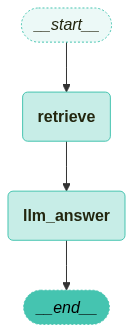

In [36]:
# Í∑∏ÎûòÌîÑ ÏÉùÏÑ± : ÌòÑÏû¨Ïùò StateÎ•º Í∏∞Î∞òÏúºÎ°ú Îã§ÏùåÏóê Ïã§ÌñâÌïú nodeÎ•º Í≤∞Ï†ïÌïòÎäî Í∏∞Îä• Ï†ïÏùò

from langgraph.graph import END, StateGraph
from langgraph.checkpoint.memory import MemorySaver
from langchain_teddynote.graphs import visualize_graph

workflow = StateGraph(GraphState) # Í∑∏ÎûòÌîÑ ÏÉùÏÑ±

# ÎÖ∏Îìú Ï†ïÏùò
workflow.add_node("retrieve", retrieve_document)
workflow.add_node("llm_answer", llm_answer)

# Ïó£ÏßÄ Ï†ïÏùò
workflow.add_edge("retrieve", "llm_answer") # Í≤ÄÏÉâ -> ÎãµÎ≥Ä
workflow.add_edge("llm_answer", END) # ÎãµÎ≥Ä ->Ï¢ÖÎ£å

# Í∑∏ÎûòÌîÑ ÏßÑÏûÖÏ†ê ÏÑ§Ï†ï
workflow.set_entry_point("retrieve")

# Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏ ÏÑ§Ï†ï
memory = MemorySaver()

# Ïª¥ÌååÏùº
app = workflow.compile(checkpointer=memory)

visualize_graph(app)

In [37]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import invoke_graph, stream_graph, random_uuid

# config ÏÑ§Ï†ï(Ïû¨ÏúÑ ÏµúÎåÄ ÌöüÏàò, thread_id)
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})

# ÏßàÎ¨∏ ÏûÖÎ†•
inputs = GraphState(question = "Ìà¨ÏûêÌïú Í∏∞ÏóÖÏ§ëÏóêÏÑú Í∏àÏï°Ïù¥ ÏàòÏùµÏù¥ ÌÅ∞Í≥≥ÏùÄ Ïñ¥ÎîîÏûÖÎãàÍπå?")

# Í∑∏ÎûòÌîÑ Ïã§Ìñâ
invoke_graph(app, inputs, config)


üîÑ Node: retrieve üîÑ
- - - - - - - - - - - - - - - - - - - - - - - - - 
context:
<document><content>Ìà¨ÏûêÌïòÍ∏∞Î°ú ÌïòÎ©¥ÏÑú Ïò§ÌîàAIÏùò ÏßÄÎ∂Ñ 49%Î•º ÌôïÎ≥¥ÌñàÏúºÎ©∞, Ïò§ÌîàAIÎäî ÎßàÏù¥ÌÅ¨Î°úÏÜåÌîÑÌä∏Ïùò Ïï†Ï†Ä(Azure)
ÌÅ¥ÎùºÏö∞Îìú ÌîåÎû´ÌèºÏùÑ ÏÇ¨Ïö©Ìï¥ AI Î™®Îç∏ÏùÑ ÌõàÎ†®
¬£Íµ¨Í∏Ä, ÌÅ¥ÎùºÏö∞Îìú Í≤ΩÏüÅÎ†• Í∞ïÌôîÎ•º ÏúÑÌï¥ ÏÉùÏÑ± AI Ìà¨Ïûê ÌôïÎåÄ
n Íµ¨Í∏ÄÏùÄ ÏàòÏùµÎ•†Ïù¥ ÎÜíÏùÄ ÌÅ¥ÎùºÏö∞Îìú Ïª¥Ìì®ÌåÖ ÏãúÏû•ÏóêÏÑú ÏïÑÎßàÏ°¥Í≥º ÎßàÏù¥ÌÅ¨Î°úÏÜåÌîÑÌä∏Î•º Îî∞ÎùºÏû°Í≥†Ïûê ÏÉùÏÑ± AIÎ•º
ÌÜµÌïú Í∏∞ÏóÖ Í≥†Í∞ùÏùò ÌÅ¥ÎùºÏö∞Îìú ÏßÄÏ∂ú ÌôïÎåÄÎ•º ÏúÑÌï¥ AI Ìà¨ÏûêÎ•º ÏßÄÏÜç
‚àô Íµ¨Í∏ÄÏùÄ Ïï§Ïä§Î°úÌîΩ Ïô∏ÏóêÎèÑ AI ÎèôÏòÅÏÉÅ Ï†úÏûë ÎèÑÍµ¨Î•º Í∞úÎ∞úÌïòÎäî Îü∞Ïõ®Ïù¥(Runway)ÏôÄ Ïò§ÌîàÏÜåÏä§ ÏÜåÌîÑÌä∏Ïõ®Ïñ¥
Í∏∞ÏóÖ ÌóàÍπÖ ÌéòÏù¥Ïä§(Hugging Face)ÏóêÎèÑ Ìà¨Ïûê</content><source>data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf</source><page>14</page></document>
<document><content>Í∏∞ÏóÖ ÌóàÍπÖ ÌéòÏù¥Ïä§(Hugging Face)ÏóêÎèÑ Ìà¨Ïûê
‚àô Íµ¨Í∏ÄÏùÄ Ï±óGPTÏùò Í∏∞Î∞ò Í∏∞Ïà†Í≥º ÏßÅÏ†ë Í≤ΩÏüÅÌï† Ïàò ÏûàÎäî Ï∞®ÏÑ∏ÎåÄ LLM ‚Ä

In [38]:
stream_graph(app, inputs, config)


üîÑ Node: llm_answer üîÑ
- - - - - - - - - - - - - - - - - - - - - - - - - 
Íµ¨Í∏ÄÏù¥ Ïï§Ïä§Î°úÌîΩÏóê ÏµúÎåÄ 20Ïñµ Îã¨Îü¨Î•º Ìà¨ÏûêÌñàÏúºÎ©∞, Ïù¥Îäî ÏàòÏùµÏÑ±Ïù¥ ÎÜíÏùÄ ÌÅ¥ÎùºÏö∞Îìú Ïª¥Ìì®ÌåÖ ÏãúÏû•ÏóêÏÑúÏùò Í≤ΩÏüÅÎ†•ÏùÑ Í∞ïÌôîÌïòÍ∏∞ ÏúÑÌïú Ï†ÑÎûµÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§. Îî∞ÎùºÏÑú, Íµ¨Í∏ÄÏù¥ Ìà¨ÏûêÌïú Ïï§Ïä§Î°úÌîΩÏù¥ ÏàòÏùµÏù¥ ÌÅ∞ Í∏∞ÏóÖÏúºÎ°ú ÌåêÎã®Îê©ÎãàÎã§.

**Source**
- data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf (page 14)

In [39]:
outputs = app.get_state(config).values
outputs

{'question': 'Ìà¨ÏûêÌïú Í∏∞ÏóÖÏ§ëÏóêÏÑú Í∏àÏï°Ïù¥ ÏàòÏùµÏù¥ ÌÅ∞Í≥≥ÏùÄ Ïñ¥ÎîîÏûÖÎãàÍπå?',
 'context': '<document><content>Ìà¨ÏûêÌïòÍ∏∞Î°ú ÌïòÎ©¥ÏÑú Ïò§ÌîàAIÏùò ÏßÄÎ∂Ñ 49%Î•º ÌôïÎ≥¥ÌñàÏúºÎ©∞, Ïò§ÌîàAIÎäî ÎßàÏù¥ÌÅ¨Î°úÏÜåÌîÑÌä∏Ïùò Ïï†Ï†Ä(Azure)\nÌÅ¥ÎùºÏö∞Îìú ÌîåÎû´ÌèºÏùÑ ÏÇ¨Ïö©Ìï¥ AI Î™®Îç∏ÏùÑ ÌõàÎ†®\n¬£Íµ¨Í∏Ä, ÌÅ¥ÎùºÏö∞Îìú Í≤ΩÏüÅÎ†• Í∞ïÌôîÎ•º ÏúÑÌï¥ ÏÉùÏÑ± AI Ìà¨Ïûê ÌôïÎåÄ\nn Íµ¨Í∏ÄÏùÄ ÏàòÏùµÎ•†Ïù¥ ÎÜíÏùÄ ÌÅ¥ÎùºÏö∞Îìú Ïª¥Ìì®ÌåÖ ÏãúÏû•ÏóêÏÑú ÏïÑÎßàÏ°¥Í≥º ÎßàÏù¥ÌÅ¨Î°úÏÜåÌîÑÌä∏Î•º Îî∞ÎùºÏû°Í≥†Ïûê ÏÉùÏÑ± AIÎ•º\nÌÜµÌïú Í∏∞ÏóÖ Í≥†Í∞ùÏùò ÌÅ¥ÎùºÏö∞Îìú ÏßÄÏ∂ú ÌôïÎåÄÎ•º ÏúÑÌï¥ AI Ìà¨ÏûêÎ•º ÏßÄÏÜç\n‚àô Íµ¨Í∏ÄÏùÄ Ïï§Ïä§Î°úÌîΩ Ïô∏ÏóêÎèÑ AI ÎèôÏòÅÏÉÅ Ï†úÏûë ÎèÑÍµ¨Î•º Í∞úÎ∞úÌïòÎäî Îü∞Ïõ®Ïù¥(Runway)ÏôÄ Ïò§ÌîàÏÜåÏä§ ÏÜåÌîÑÌä∏Ïõ®Ïñ¥\nÍ∏∞ÏóÖ ÌóàÍπÖ ÌéòÏù¥Ïä§(Hugging Face)ÏóêÎèÑ Ìà¨Ïûê</content><source>data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf</source><page>14</page></document>\n<document><content>Í∏∞ÏóÖ ÌóàÍπÖ ÌéòÏù¥Ïä§(Hugging Face)ÏóêÎèÑ Ìà¨Ïûê\n‚àô Íµ¨Í∏ÄÏùÄ Ï±óGPTÏùò Í∏∞Î∞ò Í∏∞Ïà†Í≥º ÏßÅÏ†ë Í≤ΩÏüÅÌï† Ïàò